# Multiple Linear Regression 

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Effects on House Price 
Multiple Regression Modelling to predict house price based on multiple factors including area, bedrooms, washrooms, style, etc.

In [ ]:
# import dataset
df = pd.read_csv('../data/house_prices.csv')
df.head()

`2.` Multiple linear regression model using area, bedrooms and washrooms

In [ ]:
# add intercept
x = sm.add_constant(df[['area', 'bedrooms', 'bathrooms']])

# fit model
mod = sm.OLS(df.price, x)
res = mod.fit()
res.summary()

## Dummy Variables for Categorical Variables

In [ ]:
# import dataset
df = pd.read_csv('../data/house_prices.csv')
df.head()

### Create regression model with Baseline 
Fit a linear model using **neighborhood A** as baseline to predict the price. 

In [ ]:
# get dummy variables
nbrgood_dummies = pd.get_dummies(df['neighborhood'], prefix='nbrhood')

In [ ]:
# create new df with dummy variables
df_new = df.join(nbrgood_dummies)
df_new.head()

In [ ]:
# Add intercept and Fit linear model for neighborhood levels
df_new['intercept'] = 1

lm = sm.OLS(df_new['price'], df_new[['intercept', 'nbrhood_B', 'nbrhood_C']])
results = lm.fit()
results.summary()

Since the coefficients are a comparison of the category to the **baseline** which is neighbourhood A, a positive coefficient implies that category is more expensive than baseline. Thus, **neighborhood B** is the most expensive and **neighborhood C** is the least expensive

### Statistical Significance 
Based on the regression results above, **neighborhood A** average prices differs from **neighborhood B** as the p-value is below significance level. Similarly, neighborhood B and C average prices differ as the confidence intervals for B and C do not overlap.

### Visual Representation of Results
The histogram below shows the difference in average home prices based on neighbourhood. As expected, differences are observed for Neighbourhood B against A and C.

In [ ]:
plt.hist(df_new.query("nbrhood_C == 1")['price'], alpha = 0.3, label = 'nbrhood_C');
plt.hist(df_new.query("nbrhood_A == 1")['price'], alpha = 0.3, label = 'nbrhood_A');
plt.hist(df_new.query("nbrhood_B == 1")['price'], alpha = 0.3, label = 'nbrhood_B');

plt.legend();

In [ ]:
# Add dummy variables for style of house
style_dummies = pd.get_dummies(df_new['style'], prefix='style')
df_new = df_new.join(style_dummies)
df_new.head()

In [ ]:
# use style_ranch as baseline and fit linear model
lm3 = sm.OLS(df_new['price'], df_new[['intercept', 'nbrhood_B', 'nbrhood_C', 'style_lodge', 'style_victorian', 'bedrooms', 'bathrooms']])
results3 = lm3.fit()
results3.summary()

## Multicollinearity and VIF (Variance Inflation Factor)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('../data/house_prices.csv')
df.head()

Use **seaborn** to look at pairwise relationships for all explanatory variables in the dataset

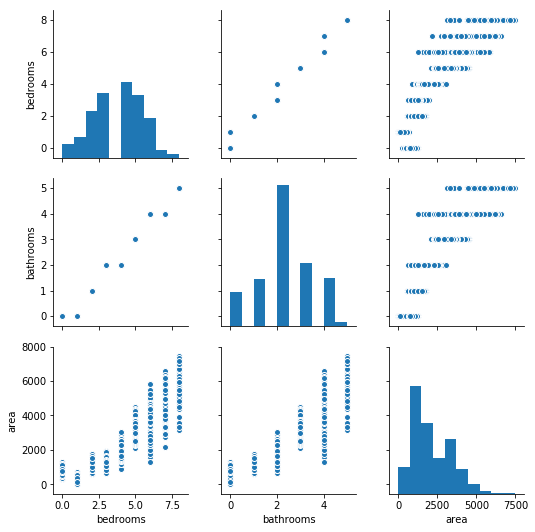

In [118]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

The pairwise plots indicate a positive relationship between all three explanatory variables **bedrooms**, **bathrooms**, and **area**. As one increases, the others increase as well.

### Linear model to predict prices

In [119]:
# Add intercept and Fit linear model for neighborhood levels
df['intercept'] = 1

lm = sm.OLS(df['price'], df_new[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        16:11:29   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

However, the linear model shows a negative coefficient for bedrooms contradicting the positive relationship observed earlier. This implies multicollinearity between the variables. Further investigation is done using VIFs below

### VIFs Calculation

In [126]:
# get y and X dataframes based on regression:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

In [127]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [122]:
vif.round(1)

,VIF Factor,features
0,7.3,Intercept
1,5.5,area
2,20.9,bedrooms
3,19.0,bathrooms


The general rule is that multicollinearity exists if the VIF factor is greater than 10. Hence, both bedrooms and bathrooms are highly correlated factors. 

To fix this issue, one of these variables can be removed from the regression model. 

### Fix Multicollinearity - Remove Bathrooms from model

In [129]:
# Fit linear model for neighborhood levels
lm = sm.OLS(df['price'], df_new[['intercept', 'area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        16:19:34   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The removal of `bathrooms` fixed the direction of coefficients highlighting the positive relationship between price and area, bedrooms.